## Lab 3: Naive Bayes and Neural Networks

### Ruojia Kuang

### Primary Goal: Income classification
* Prediction task is to determine whether a person makes over 50K a year.
* Use Naive Bayes, neural networks, and at least two other models to answer the question

In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import  OneHotEncoder, RobustScaler, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/Users/ruojiakuang/Desktop/GSB 545 Advanced ML/income_evaluation.csv")

### 1. Exploratory data analysis 
Now, I will explore the data to gain insights about the data.

In [3]:
# print the shape
print('The shape of the dataset : ', df.shape)

The shape of the dataset :  (32561, 15)


In [4]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.isnull().mean()

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education_num     0.0
marital_status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital_gain      0.0
capital_loss      0.0
hours_per_week    0.0
native_country    0.0
income            0.0
dtype: float64

Findings
- We can see that the dataset contains 9 character variables and 6 numerical variables.

- income is the target variable.

- There are no missing values in the dataset. I will explore this later,

In [8]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [9]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
# check for missing values

df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

We can see that there are no missing values in the dataset.

### 2 Split data into separate training and test set

In [11]:
X = df.drop(['income'], axis=1)

y = df['income']

In [12]:
cols = X.columns

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [14]:
# check the shape of X_train and X_test
for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)  
X_train.shape, X_test.shape

((22792, 14), (9769, 14))

In [15]:
# Display categorical variables in training set
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [16]:
# Display numerical variables in training set
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [17]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

workclass         0.0
education         0.0
marital_status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
native_country    0.0
dtype: float64

In [18]:
X_train[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [19]:
X_test[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [20]:
X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [21]:
X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [22]:
# preview categorical variables in X_train

X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
32098,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
25206,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23491,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States
12367,Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,Male,Guatemala
7054,Private,7th-8th,Never-married,Craft-repair,Not-in-family,White,Male,Germany


In [23]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [24]:
type(X_train)

pandas.core.frame.DataFrame

In [25]:
X_test.shape

(9769, 108)

## Initial Models

### Naive Bayes Classifier

In [26]:
# Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict and evaluate the Naive Bayes model
y_pred_gnb = gnb.predict(X_test)
print("Accuracy of the Naive Bayes model:", accuracy_score(y_test, y_pred_gnb))
print("Confusion matrix of the Naive Bayes model:\n", confusion_matrix(y_test, y_pred_gnb))

Accuracy of the Naive Bayes model: 0.7974204115057836
Confusion matrix of the Naive Bayes model:
 [[7041  366]
 [1613  749]]


### Neural Network Classifier

In [27]:
# Neural Network Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
mlp.fit(X_train, y_train)

# Predict and evaluate the Neural Network model
y_pred_mlp = mlp.predict(X_test)
print("Accuracy of the Neural Network model:", accuracy_score(y_test, y_pred_mlp))
print("Confusion matrix of the Neural Network model:\n", confusion_matrix(y_test, y_pred_mlp))

Accuracy of the Neural Network model: 0.8021291841539564
Confusion matrix of the Neural Network model:
 [[7268  139]
 [1794  568]]


### XGBoosting Model

In [28]:
# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create and fit the XGBoost classifier
xgboost_model = XGBClassifier()
xgboost_model.fit(X_train, y_train_encoded)

# Evaluate the performance of the model
y_pred = xgboost_model.predict(X_test)
print("Accuracy of the XGBoost model:", accuracy_score(y_test_encoded, y_pred))
print("Confusion matrix of the XGBoost model:\n", confusion_matrix(y_test_encoded, y_pred))

Accuracy of the XGBoost model: 0.8692803767018119
Confusion matrix of the XGBoost model:
 [[6913  494]
 [ 783 1579]]


### RandomForest

In [29]:
# Random forest model
rf_model = RandomForestClassifier(n_estimators=300, random_state=1)

# Fit the stacking model on the training data
rf_model.fit(X_train, y_train_encoded)

# Evaluate the performance of the stacking model on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the performance of the model
y_pred = rf_model.predict(X_test)
print("Accuracy of the RandomForest model:", accuracy_score(y_test_encoded, y_pred))
print("Confusion matrix of the RandomForest model:\n", confusion_matrix(y_test_encoded, y_pred))

Accuracy of the RandomForest model: 0.8543351417750026
Confusion matrix of the RandomForest model:
 [[6859  548]
 [ 875 1487]]


## Tuning

### Naive Bayes Classifier

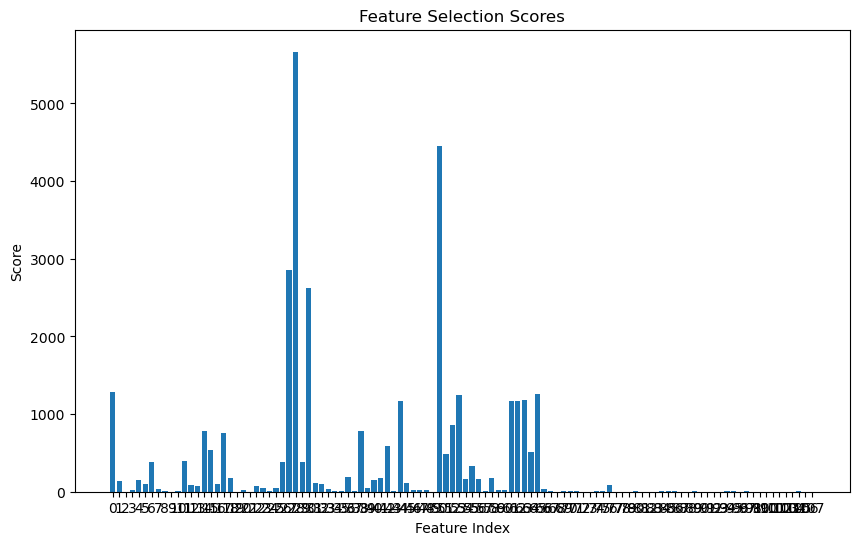

Best parameters found: {}
Best cross-validation score: 0.8315193483401911


In [30]:
# Naive Bayes Classifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Feature selection
selector = SelectKBest(score_func=f_classif)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Hyperparameter tuning
param_grid = {}
grid_search = GridSearchCV(gnb, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

# Plot results
plt.figure(figsize=(10, 6))
plt.bar(range(len(selector.scores_)), selector.scores_)
plt.xticks(range(len(selector.scores_)), [str(i) for i in range(len(selector.scores_))])
plt.xlabel('Feature Index')
plt.ylabel('Score')
plt.title('Feature Selection Scores')
plt.show()

# Print best parameters and score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

### Neural Network Classifier

Accuracy of the tuned Neural Network model: 0.7796089671409561
Confusion matrix of the tuned Neural Network model:
 [[7379   28]
 [2125  237]]


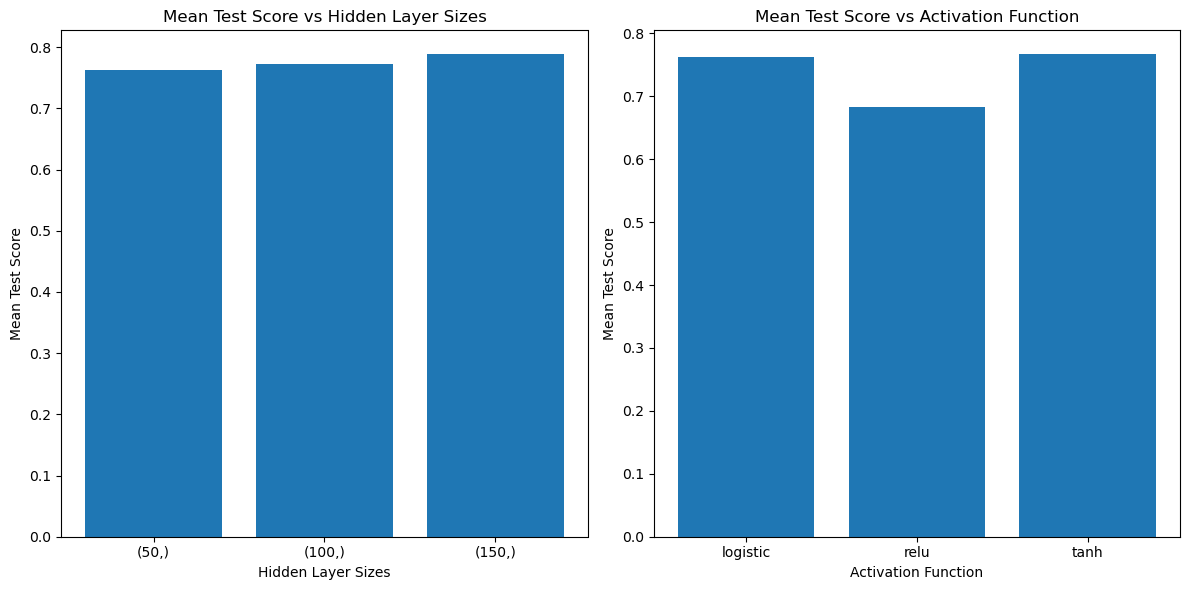

Best parameters found: {'activation': 'relu', 'hidden_layer_sizes': (150,), 'solver': 'adam'}
Best cross-validation score: 0.788170946936182


In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Define the parameter grid to search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],  # Different sizes of hidden layers
    'activation': ['logistic', 'tanh', 'relu'],      # Activation functions
    'solver': ['adam', 'sgd'],                        # Solvers for weight optimization
}

# Create the MLPClassifier
mlp = MLPClassifier(max_iter=500)

# Perform grid search
grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_mlp_tuned = grid_search.predict(X_test)
print("Accuracy of the tuned Neural Network model:", accuracy_score(y_test, y_pred_mlp_tuned))
print("Confusion matrix of the tuned Neural Network model:\n", confusion_matrix(y_test, y_pred_mlp_tuned))

# Extract relevant information for plotting
results = grid_search.cv_results_
hidden_layer_sizes = [str(param['hidden_layer_sizes']) for param in results['params']]
mean_test_score = results['mean_test_score']

# Plot results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(hidden_layer_sizes, mean_test_score)
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Mean Test Score')
plt.title('Mean Test Score vs Hidden Layer Sizes')

# Extract and plot activation function results
activation_functions = results['param_activation']
activation_functions_unique = np.unique(activation_functions)
activation_scores = [mean_test_score[np.where(activation_functions == act_func)].mean() for act_func in activation_functions_unique]
plt.subplot(1, 2, 2)
plt.bar(activation_functions_unique, activation_scores)
plt.xlabel('Activation Function')
plt.ylabel('Mean Test Score')
plt.title('Mean Test Score vs Activation Function')

plt.tight_layout()
plt.show()

# Print best parameters and score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

### XGBoost Classifier

In [32]:
# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

# Create the XGBoost classifier
xgboost_model = XGBClassifier()

# Perform grid search
grid_search = GridSearchCV(xgboost_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train_encoded)

# Print best parameters and score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate the tuned model
y_pred_tuned = grid_search.best_estimator_.predict(X_test)
accuracy_tuned = accuracy_score(y_test_encoded, y_pred_tuned)
print("Accuracy of the tuned XGBoost model:", accuracy_tuned)
print("Confusion matrix of the tuned XGBoost model:\n", confusion_matrix(y_test_encoded, y_pred_tuned))

Best parameters found: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
Best cross-validation score: 0.8731130463338601
Accuracy of the tuned XGBoost model: 0.8714300337803256
Confusion matrix of the tuned XGBoost model:
 [[6940  467]
 [ 789 1573]]


### RandomForest

In [33]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest classifier
rf_model = RandomForestClassifier(random_state=1)

# Perform grid search
grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train_encoded)

# Print best parameters and score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate the tuned model
y_pred_tuned = grid_search.best_estimator_.predict(X_test)
accuracy_tuned = accuracy_score(y_test_encoded, y_pred_tuned)
print("Accuracy of the tuned Random Forest model:", accuracy_tuned)
print("Confusion matrix of the tuned Random Forest model:\n", confusion_matrix(y_test_encoded, y_pred_tuned))

Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best cross-validation score: 0.8647768360246972
Accuracy of the tuned Random Forest model: 0.8632408639574163
Confusion matrix of the tuned Random Forest model:
 [[6963  444]
 [ 892 1470]]


In conclusion, the tuned Random Forest model has best performance with an accuracy of 86.32%. However, the recall for the positive class is moderate at approximately 62.24%.